In [1]:
import pandas as pd

p = pd.read_csv('monthly-sunspots.csv')
p

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3247,3247,2019-08-31,0.5
3248,3248,2019-09-30,1.1
3249,3249,2019-10-31,0.4
3250,3250,2019-11-30,0.5


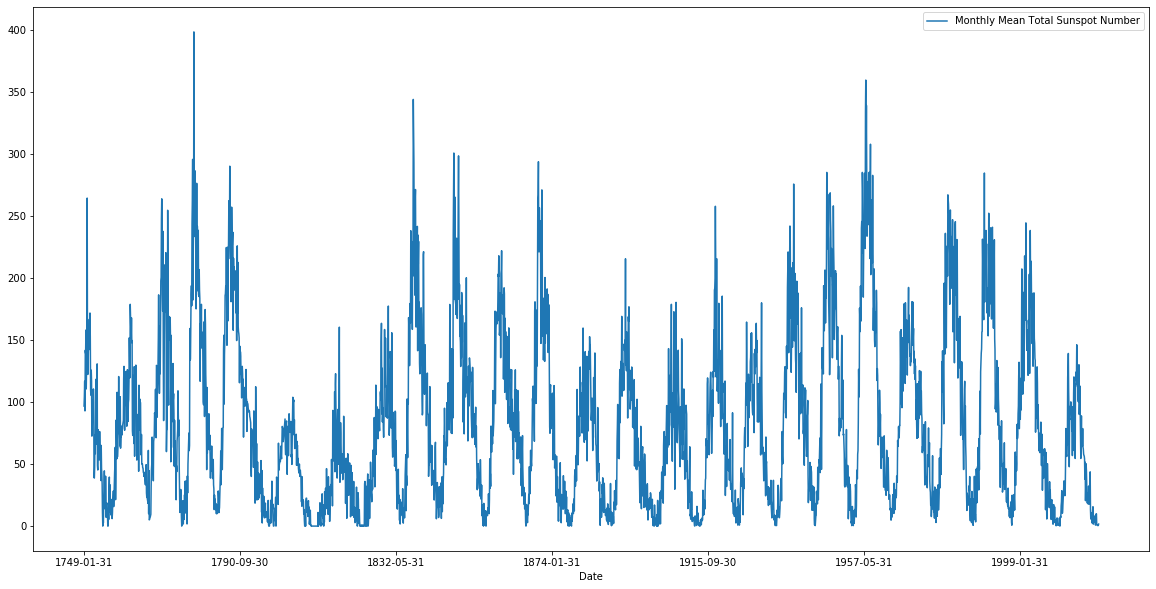

In [2]:
p.plot('Date','Monthly Mean Total Sunspot Number', figsize =(20,10))


In [3]:
import numpy as np
date = p['Date'].to_numpy()
ss= p['Monthly Mean Total Sunspot Number'].to_numpy()

In [4]:
s = np.where(date=='2010-01-31')
print(s[0][0])

3132


In [5]:
def seq(ss,k):
    data_raw_training = ss[:3132]
    data_training = []
    # k=24
    for index in range(len(data_raw_training) - k - 1): 
            data_training.append(data_raw_training[index: index + k + 1])

    data_raw_test = ss[3131:]
    data_test = []

    for i in range(len(data_raw_test) - k - 1): 
            data_test.append(data_raw_test[i: i + k + 1])        

    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    for i in range(len(data_training)):
        x_train.append(data_training[i][:-1])
        y_train.append(data_training[i][-1])

    for i in range(len(data_test)):
        x_test.append(data_test[i][:-1])
        y_test.append(data_test[i][-1])

    return x_train,y_train,x_test,y_test

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
error_k = []
k_v = [x for x in range(1,25)]
for j in range(1,25):
    x_train,y_train,x_test,y_test = seq(ss,j)
    
    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    y_train = y_train.reshape(-1,1)
    x_test = np.asarray(x_test)
    y_test = np.asarray(y_test)
    y_test = y_test.reshape(-1,1)

    
    nr,nc = x_train.shape
    B = np.ones((nr,1))
    X = np.hstack((x_train,B))
    lr = LinearRegression()
    lr.fit(X, y_train)
    w = lr.coef_[0]
    # print('Coeficientes do preditor linear')
    # print(w)
    
    print('K =',j)
    
    print('Cross Validation Score no final de treinamento após o término do treinamento - Preditor Linear')
    nr,nc = x_train.shape
    B = np.ones((nr,1))
    X = np.hstack((x_train,B))
    y_pred = X.dot(w)

#     MSE_train = np.sqrt(mean_squared_error(y_train,y_pred))
#     print(MSE_train,'\n')
    MSE_train = np.mean(cross_val_score(lr, X, y_train, 
                                       cv=5,
                                       scoring ='neg_mean_squared_error'))
    error = np.sqrt(-MSE_train)
    error_k.append(error)
    print(error,'\n')
#     print('Cross Validation Score: ',,'\n')
    
    print('REQM final de teste após o término do treinamento - Preditor Linear')
    nr,nc = x_test.shape
    B = np.ones((nr,1))
    X = np.hstack((x_test,B))
    y_pred = X.dot(w)
    MSE_test = np.sqrt(mean_squared_error(y_test,y_pred))
    print(MSE_test)
    print('________________________________________________\n')

K = 1
Cross Validation Score no final de treinamento após o término do treinamento - Preditor Linear
27.26264650396482 

REQM final de teste após o término do treinamento - Preditor Linear
17.248127231698625
________________________________________________

K = 2
Cross Validation Score no final de treinamento após o término do treinamento - Preditor Linear
26.23067338997921 

REQM final de teste após o término do treinamento - Preditor Linear
16.6217773822554
________________________________________________

K = 3
Cross Validation Score no final de treinamento após o término do treinamento - Preditor Linear
25.74832261247933 

REQM final de teste após o término do treinamento - Preditor Linear
16.725395043676695
________________________________________________

K = 4
Cross Validation Score no final de treinamento após o término do treinamento - Preditor Linear
25.497068193310962 

REQM final de teste após o término do treinamento - Preditor Linear
16.528517345563007
___________________

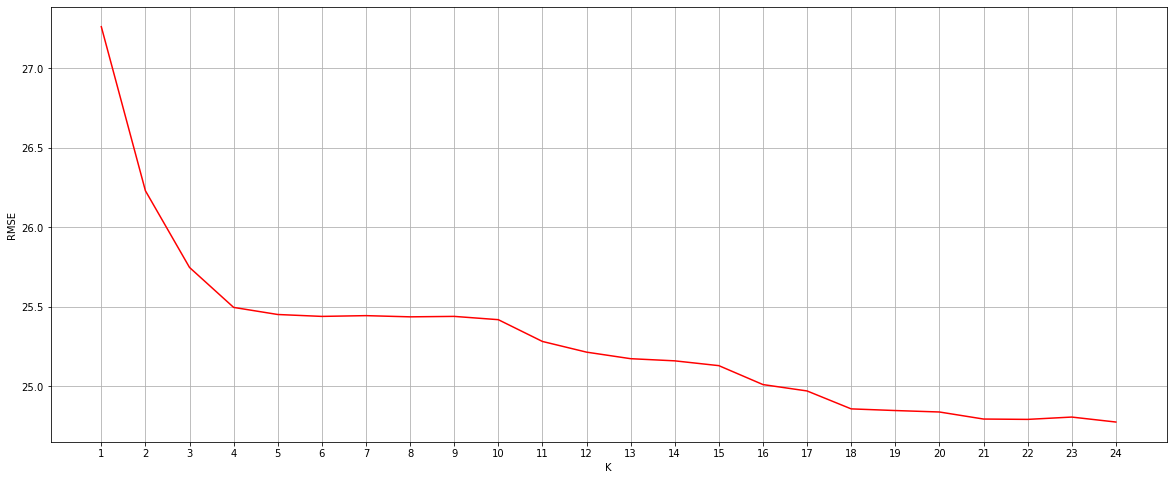

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8));
plt.plot(k_v,error_k, color='red', label='Valor esperado')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.xticks(k_v)
plt.grid('on')

15.897850774385617


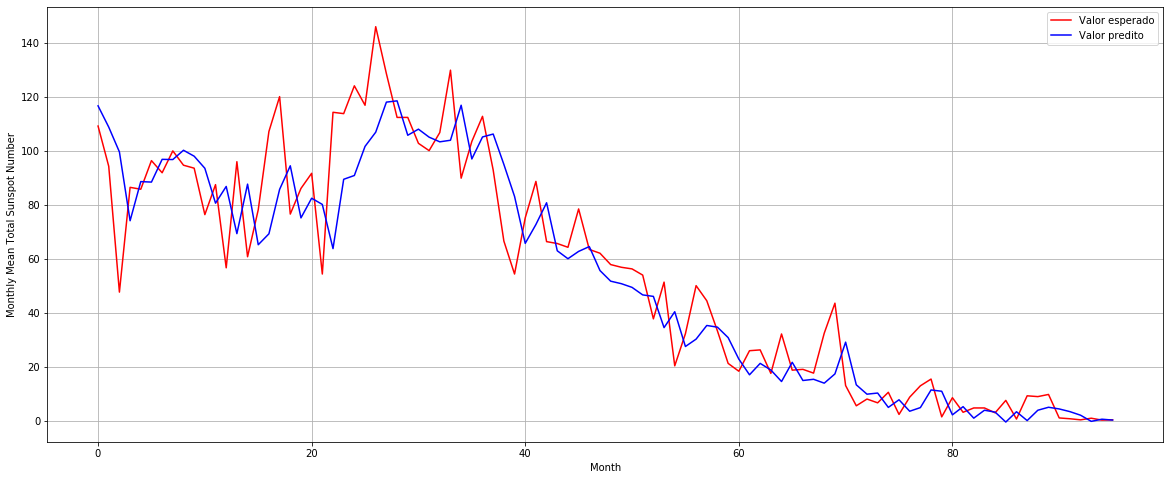

In [8]:
import matplotlib.pyplot as plt
x_train,y_train,x_test,y_test = seq(ss,24)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_train = y_train.reshape(-1,1)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
y_test = y_test.reshape(-1,1)


nr,nc = x_train.shape

B = np.ones((nr,1))
X = np.hstack((x_train,B))
lr = LinearRegression()
lr.fit(X, y_train)
w = lr.coef_[0]

nr,nc = x_test.shape
B = np.ones((nr,1))
X = np.hstack((x_test,B))
y_pred = X.dot(w)

y_pred = y_pred.reshape(-1, 1)

plt.figure(figsize=(20, 8));
plt.plot(y_test, color='red', label='Valor esperado')
plt.plot(y_pred, color='blue', label='Valor predito')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.xlabel('Month')
plt.legend(loc ='best')
plt.grid('on')
print(np.sqrt(mean_squared_error(y_pred,y_test)))

In [9]:
def seq_n(ss,k):
    data_raw_training = ss[:3132]
    data_training = []
    # k=24
    
    max_train = np.max(data_raw_training)
    data_raw_training = data_raw_training/(max_train*2)
    
    for index in range(len(data_raw_training) - k - 1): 
            data_training.append(data_raw_training[index: index + k + 1])

    data_raw_test = ss[3131:]
    data_test = []
    
    max_test = np.max(data_raw_test)
    data_raw_test = data_raw_test/(max_test*2)
    
    for i in range(len(data_raw_test) - k - 1): 
            data_test.append(data_raw_test[i: i + k + 1])        

    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    for i in range(len(data_training)):
        x_train.append(data_training[i][:-1])
        y_train.append(data_training[i][-1])

    for i in range(len(data_test)):
        x_test.append(data_test[i][:-1])
        y_test.append(data_test[i][-1])

    return x_train,y_train,x_test,y_test,max_train,max_test

In [10]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
ss= p['Monthly Mean Total Sunspot Number'].to_numpy()
x_train,y_train,x_test,y_test,max_train,max_test = seq_n(ss,8)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_train = y_train.reshape(-1,1)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
y_test = y_test.reshape(-1,1)
print(x_train.shape)

(3123, 8)


In [11]:
nr,nc = x_train.shape
B = np.ones((nr,1))
X = np.hstack((x_train,B))

# kf = KFold(5,True,1)
# kf.get_n_splits(X)

# for train_index,test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     Y_train, Y_test = y_train[train_index], y_train[test_index]
    
# print(X_train.shape)

In [12]:
def bestc(xtr,ytr,vmin,vmax,k,m):
    c_graph =[]
    tx_graph = []
    rmse = []
    kf = KFold(10,True,1)
    kf.get_n_splits(X)

    for train_index,test_index in kf.split(X):
        xt, xv = xtr[train_index], xtr[test_index]
        yt, yv = ytr[train_index], ytr[test_index]
    

        for p in range(vmin,vmax,k):

#             c = 2**p
            c=1
            w = np.dot(np.linalg.inv(np.dot(xt.T,xt)+c*np.eye(m)),np.dot(xt.T,yt))
            y_pred = np.dot(xv,w)
            rmse.append(np.sqrt(mean_squared_error(yv,y_pred)))
    erro_medio = np.mean(rmse)
    return c_graph,tx_graph,erro_medio
        
        


In [13]:
def bestc_t(xtr,ytr,vmin,vmax,k,m):
    kf = KFold(10,True,1)
    kf.get_n_splits(X)
    n_c = []
    err_c = []
    for p in range(vmin,vmax,k):
        
        rmse = []
        for train_index,test_index in kf.split(X):
            xt, xv = xtr[train_index], xtr[test_index]
            yt, yv = ytr[train_index], ytr[test_index]
            
            
            c = 2**p
            w = np.dot(np.linalg.inv(np.dot(xt.T,xt)+c*np.eye(m)),np.dot(xt.T,yt))
            y_pred = np.dot(xv,w)
            
            rmse.append(np.sqrt(mean_squared_error(yv,y_pred)))
        err_c.append(np.mean(rmse))   
        n_c.append(c)
    
    return n_c,err_c

In [20]:
np.random.seed(122580)
err_t = []
for T in range(1,101):
#     W = np.random.normal(scale=0.01 ,size = (T, X.shape[1]))
    W = np.random.uniform(high = 0.5,size = (T, X.shape[1]))
    htr_ = np.dot(X,W.T)
#     htr0 = np.ones((1,htr.shape[0]))
#     htr0 = htr0.T
#     htr = np.hstack((htr0,htr))
    htr0 = np.ones((htr_.shape[0],1))
#     htr0 = htr0.T
    htr = np.hstack((htr_,htr0))
    
    Htr = np.tanh(htr)
    
#     Htr = np.copy(htr)
#     for i in range(htr.shape[0]):
#         for j in range(htr.shape[1]):
#             Htr[i,j] = np.tanh(htr[i,j])

    c, t, err = bestc(Htr,y_train,0,2,1,T+1)
    err_t.append(err)
erro_n = [x*max_train*2 for x in err_t]
# err_t = max_train*err_t
print(W.shape)

(100, 9)


87
25.48109441233927


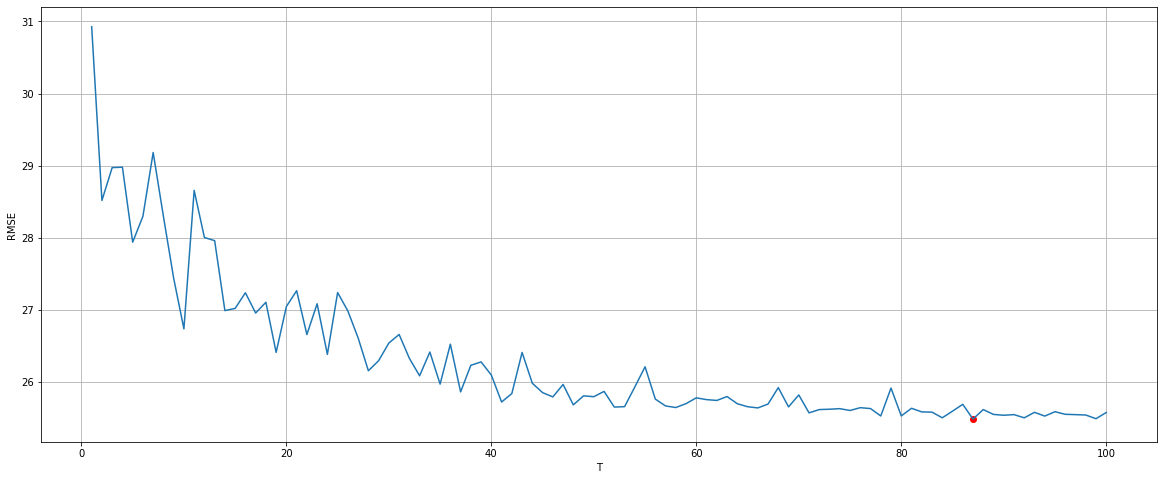

In [15]:
T = [x for x in range(1,101)]
plt.figure(figsize=(20, 8))
plt.plot(T,erro_n)
plt.scatter(T[86],erro_n[86], color = 'red')
plt.grid('on')
plt.xlabel('T')
plt.ylabel('RMSE')
print(T[err_t.index(min(err_t))])
print(erro_n[err_t.index(min(err_t))])

In [21]:
np.random.seed(122580)
best_c=[]
best_e= []
for T in range(1,101):
#     W = np.random.normal(scale=0.01 ,size = (T, X.shape[1]))
    W = np.random.uniform(high = 0.5,size = (T, X.shape[1]))
    htr_ = np.dot(X,W.T)
    htr0 = np.ones((htr_.shape[0],1))
    htr = np.hstack((htr_,htr0))
    
    Htr = np.tanh(htr)

    n_c,err_c = bestc_t(Htr,y_train,-10,10,1,T+1)
    err_c_n = [x*max_train*2 for x in err_c]
    idx_min = err_c_n.index(min(err_c_n))
    best_c.append(n_c[idx_min])
    best_e.append(err_c_n[idx_min])

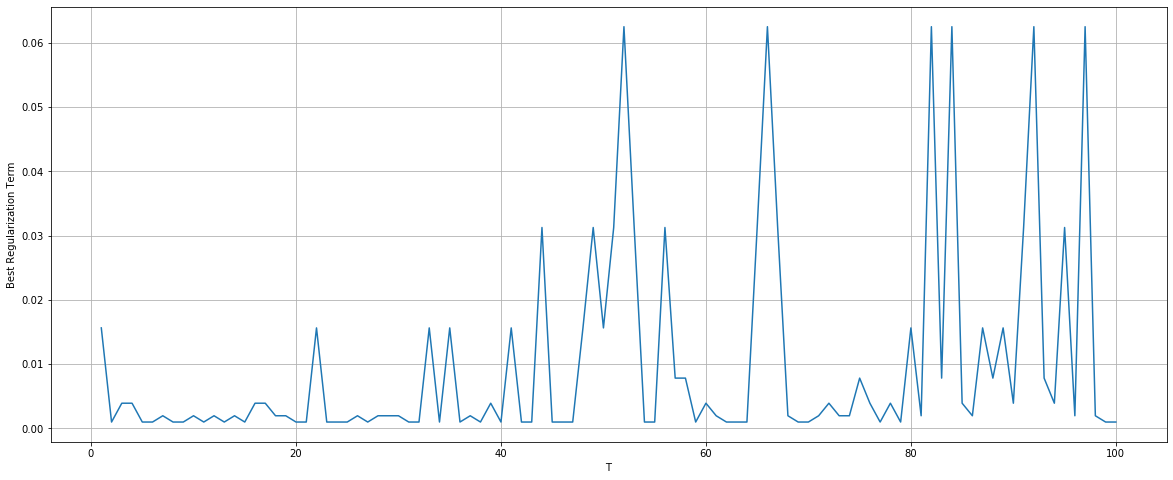

0.0078125


In [22]:
# print(n_c,'\n')
# print(err_c)

# print(best_c)
# print(best_e)
# plt.plot(n_c,err_c)
# plt.show()
T = [x for x in range(1,101)]
plt.figure(figsize=(20, 8))
plt.plot(T,best_c)
plt.xlabel('T')
plt.ylabel('Best Regularization Term')
plt.grid('on')
plt.show()
print(best_c[T[erro_n.index(min(erro_n))]])

In [18]:
T = 86
c = 0.0078125
nr,nc = x_test.shape
B = np.ones((nr,1))
Xtest = np.hstack((x_test,B))
W = np.random.normal(scale=0.5 ,size = (T, X.shape[1]))
htr_ = np.dot(X,W.T)
htr0 = np.ones((htr_.shape[0],1))
htr = np.hstack((htr_,htr0))
    
Htr = np.tanh(htr)


htest = np.dot(Xtest,W.T)
htr0test = np.ones((htest.shape[0],1))
htest = np.hstack((htest,htr0test))
    
Htest = np.tanh(htest)


w = np.dot(np.linalg.inv(np.dot(Htr.T,Htr)+c*np.eye(T+1)),np.dot(Htr.T,y_train))

y_pred2 = np.dot(Htest,w)

rmse = (np.sqrt(mean_squared_error(y_test,y_pred2)))
rmse = rmse*max_test*2
print(rmse)



16.727047824060943


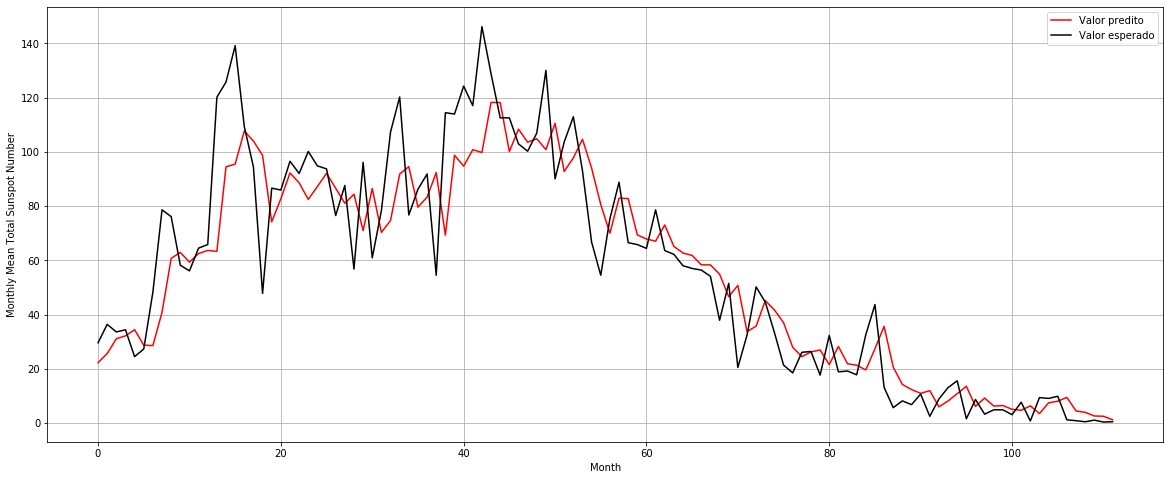

In [19]:
plt.figure(figsize=(20, 8))
y_pred2_n = y_pred2*max_test*2
y_test_n = y_test*max_test*2
plt.plot(y_pred2_n,color='red',label='Valor predito')
# plt.plot(y_pred,color='blue',label='Valor predito linear')
plt.plot(y_test_n,color='black', label='Valor esperado')
plt.xlabel('Month')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.legend(loc='best')
plt.grid('on')